In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline

In [2]:
# Input the dimensions of the can
H0 = 10.2   # height from LED to top of can [cm]
R0 = 0.5*9.8   # cylinder radius [CMB]

In [3]:
# read Hipparcos star catalog
pathInput = "./input/hipparcos/hip2.dat"
data = np.genfromtxt(pathInput)
ra = data[:,4]
dec = data[:,5]
mag = data[:,19]  # Hipparcos magnitude

In [4]:
# Keep only brightest stars, and choose hemisphere
magThresh = 4.5 #5.
selection = (mag<magThresh)*(dec>0.)#*(1-np.isnan(ra))*(1-np.isnan(dec))
ra = ra[selection]   # [rad]
dec = dec[selection] # [rad]
mag = mag[selection]

# size of star point
starSize = 3.*(magThresh-mag)

print("Keeping the "+str(len(ra))+" brightest stars")

Keeping the 371 brightest stars


In [5]:
# Determine if a star should be on top or on the side of the can
r = H0 / np.tan(dec)
# create boolean masks
top = np.array(r<=R0)
side = ~top

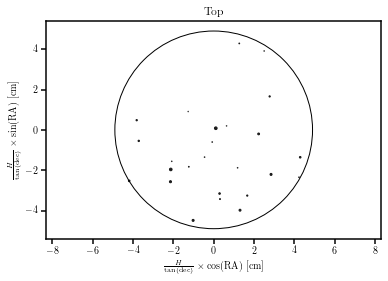

In [6]:
# For the stars that are on top of the can
xTop = r[top] * np.cos(ra[top])
yTop = r[top] * np.sin(ra[top])
starSizeTop = starSize[top]

fig=plt.figure(0)
ax=fig.add_subplot(111)

ax.scatter(xTop, yTop, s=starSizeTop)
ax.add_patch(patches.Circle((0,0), radius=R0, fill=False, edgecolor='k'))
#
plt.axis('equal')
ax.set_title('Top')
ax.set_xlabel(r'$\frac{H}{\tan(\text{dec})} \times \cos(\text{RA})$ [cm]')
ax.set_ylabel(r'$\frac{H}{\tan(\text{dec})} \times \sin(\text{RA})$ [cm]')
#
# fig.savefig("./figures/top.pdf", bbox_inches='tight')
# fig.savefig("./figures/top.png", bbox_inches='tight')
# fig.clf()
plt.show()

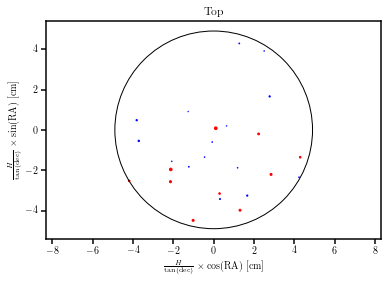

In [7]:
# For the stars that are on top of the can
xTop = r[top] * np.cos(ra[top])
yTop = r[top] * np.sin(ra[top])
starSizeTop = starSize[top]

fig=plt.figure(0)
ax=fig.add_subplot(111)
#
#
magRange = np.array((mag[top]<3.7))
ax.scatter(xTop[magRange], yTop[magRange], s=starSizeTop[magRange], c='r')
magRange = np.array((3.7<mag[top]))
ax.scatter(xTop[magRange], yTop[magRange], s=starSizeTop[magRange], c='b')
#
#
ax.add_patch(patches.Circle((0,0), radius=R0, fill=False, edgecolor='k'))
#
plt.axis('equal')
ax.set_title('Top')
ax.set_xlabel(r'$\frac{H}{\tan(\text{dec})} \times \cos(\text{RA})$ [cm]')
ax.set_ylabel(r'$\frac{H}{\tan(\text{dec})} \times \sin(\text{RA})$ [cm]')
#
fig.savefig("./figures/top.pdf", bbox_inches='tight')
fig.savefig("./figures/top.png", bbox_inches='tight')
# fig.clf()
plt.show()

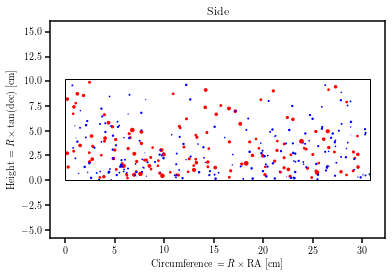

In [8]:
# for the stars that are on the side
xSide = R0 * ra[side]
ySide = R0 * np.tan(dec[side])
starSizeSide = starSize[side]

# plot
fig=plt.figure(1)
ax=fig.add_subplot(111)
#
#
magRange = np.array((mag[side]<3.7))
ax.scatter(xSide[magRange], ySide[magRange], s=starSizeSide[magRange], c='r')
magRange = np.array((3.7<mag[side]))
ax.scatter(xSide[magRange], ySide[magRange], s=starSizeSide[magRange], c='b')
#
#
ax.add_patch(patches.Rectangle((0,0), 2.*np.pi*R0, H0, fill=False, edgecolor='k'))
#
plt.axis('equal')
ax.set_title('Side')
ax.set_xlabel(r'Circumference $=R\times \text{RA}$ [cm]')
ax.set_ylabel(r'Height $=R \times \tan(\text{dec})$ [cm]')
#
fig.savefig("./figures/side.pdf", bbox_inches='tight')
fig.savefig("./figures/side.png", bbox_inches='tight')
# fig.clf()
plt.show()